In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from scipy import stats

# Data Loading and Cleaning

In [105]:
pd.set_option('display.max_columns', 500)
raw = pd.read_csv('cancer_reg.csv', encoding='ISO-8859-1').drop(columns=['Geography'])
raw

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [106]:
raw.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

### Missing Values

In [107]:
print(raw.isnull().sum()[raw.isnull().sum() > 0])

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


For all three of these columns, we will deal with the missing values through imputation, specifically mean substitution. Only numerical columns had missing values, so we don't need to deal with any categorical imputation.

In [108]:
columns_to_impute = ['PctSomeCol18_24', 'PctEmployed16_Over', 'PctPrivateCoverageAlone']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(raw[columns_to_impute])
raw[columns_to_impute] = imp.transform(raw[columns_to_impute])
print(raw.isnull().sum()[raw.isnull().sum() > 0])

Series([], dtype: int64)


### Standardization and Encoding

In [109]:
categorical_cols = ['binnedInc']
categorical_data = raw[categorical_cols]
numerical_data = raw.drop(columns=categorical_cols)

In [110]:
categorical_data

,binnedInc
0,"(61494.5, 125635]"
1,"(48021.6, 51046.4]"
2,"(48021.6, 51046.4]"
3,"(42724.4, 45201]"
4,"(48021.6, 51046.4]"
...,...
3042,"(45201, 48021.6]"
3043,"(48021.6, 51046.4]"
3044,"(51046.4, 54545.6]"
3045,"(48021.6, 51046.4]"


We will start by standardizing/normalizing the continuous variables. We will standardize the ones with that follow a normal distribution, and normalize the ones that don't follow a normal distribution. Below I have plotted the distributions, we will check normality with a Shapiro Wilk test.

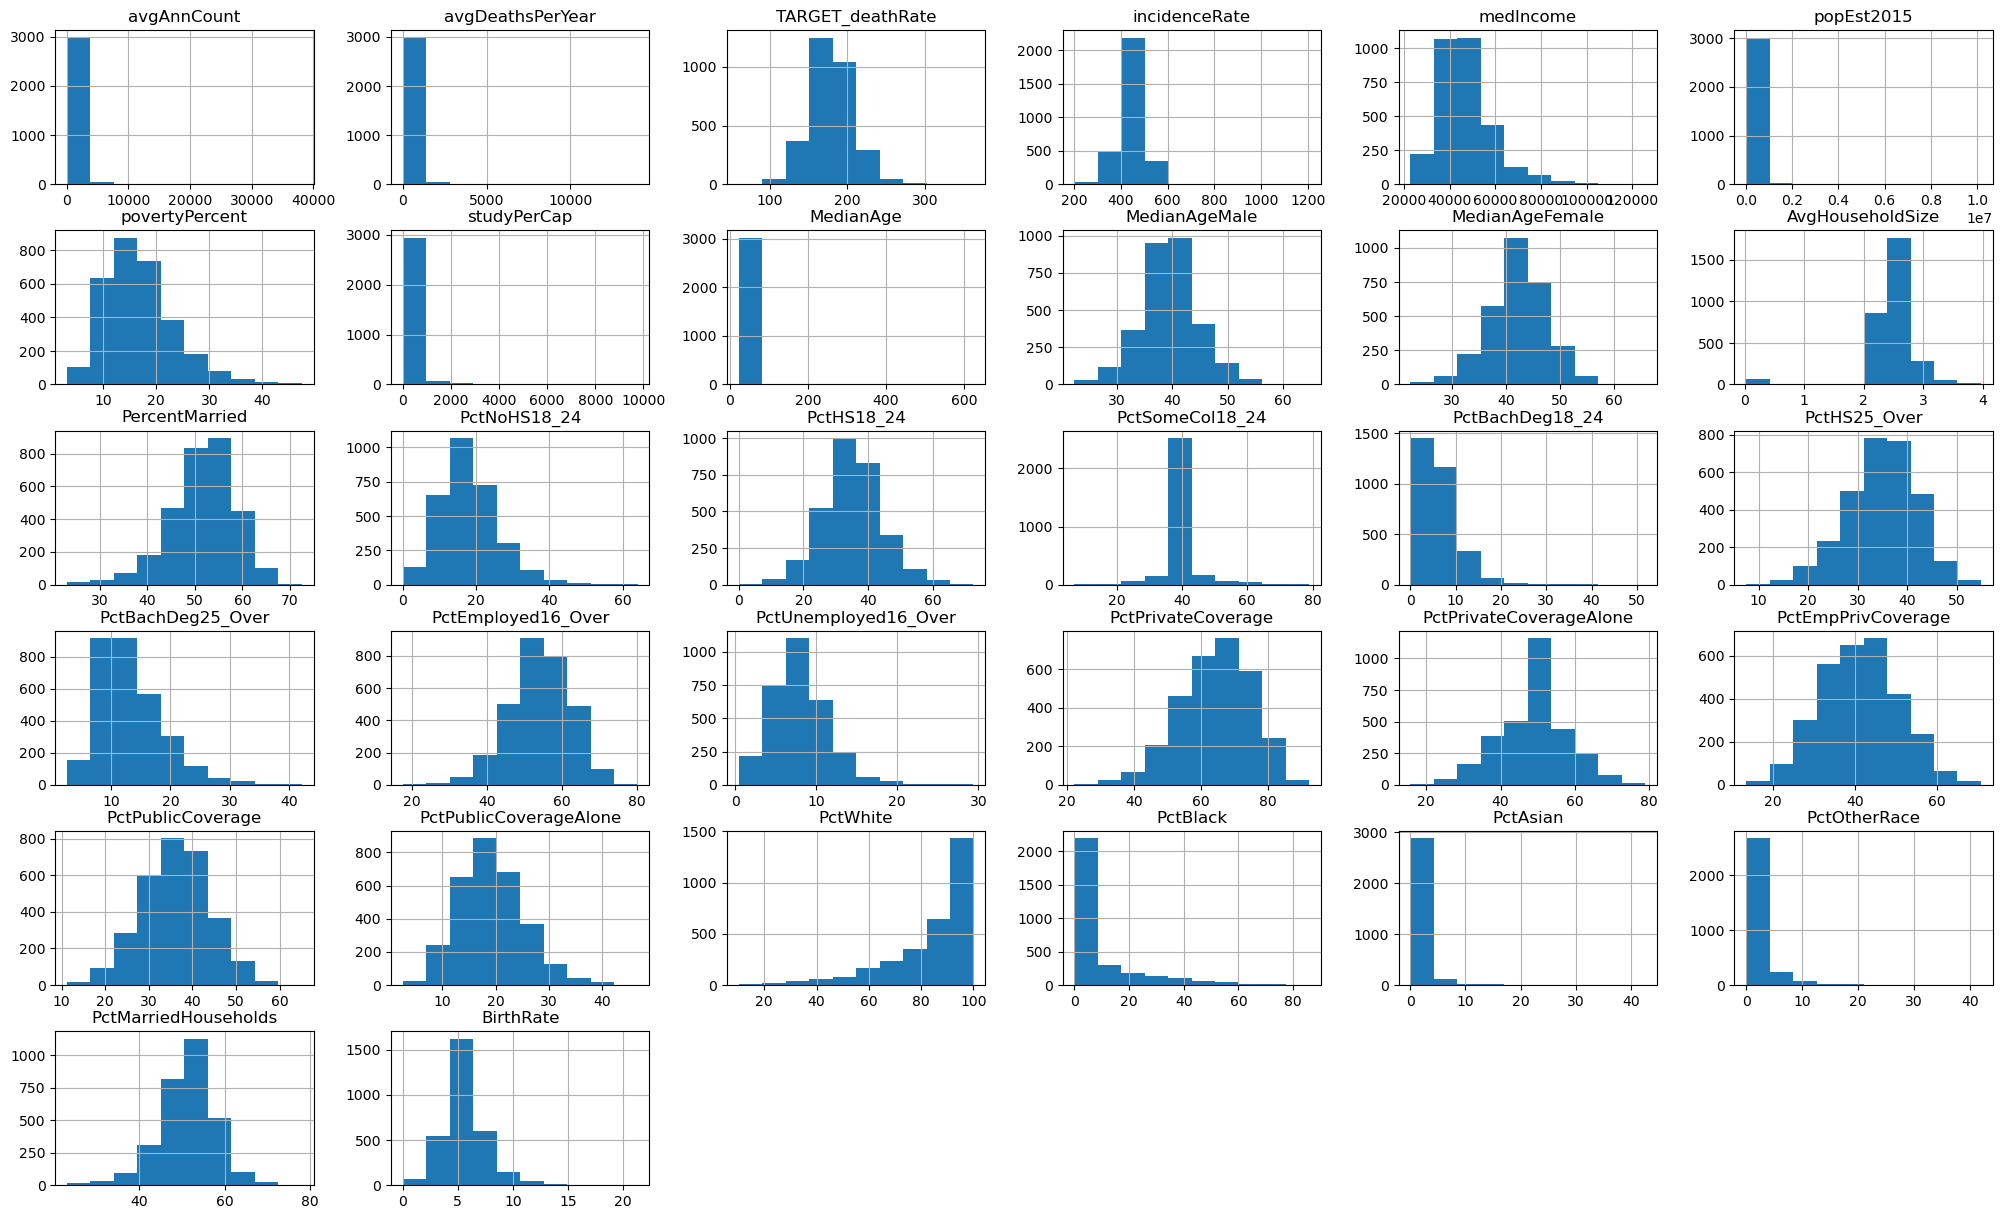

In [111]:
numerical_data.hist(figsize=(25,15));

In [112]:
normal_columns=[]
non_normal_columns=[]
for column in numerical_data.columns:
    stat, p = stats.shapiro(numerical_data[column])
    if p > 0.05:
        normal_columns.append(column)
    else:
        non_normal_columns.append(column)

print("Normal Columns:", normal_columns)
print("Non-Normal Columns:", non_normal_columns)

Normal Columns: ['PctPublicCoverage']
Non-Normal Columns: ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']


In [113]:
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
numerical_data[normal_columns] = scaler.fit_transform(numerical_data[normal_columns])
numerical_data[non_normal_columns] = minmax_scaler.fit_transform(numerical_data[non_normal_columns])
numerical_data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.036467,0.033269,0.347080,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,0.447005,0.637782,0.595142,0.179407,0.544828,0.486787,0.133205,0.331924,0.430730,0.548800,0.262069,0.754286,0.518256,0.491259,-0.427608,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917
1,0.004378,0.004783,0.335203,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231678,0.262673,0.587122,0.433198,0.095164,0.308966,0.791377,0.144788,0.391121,0.508816,0.612800,0.255172,0.684286,0.602848,0.526224,-0.657187,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182
2,0.002517,0.003355,0.379413,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,0.541475,0.658046,0.629555,0.374415,0.504828,0.471169,0.183398,0.454545,0.340050,0.452800,0.227586,0.591429,0.439873,0.374126,0.745793,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879
3,0.011037,0.014207,0.445727,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,0.486175,0.632716,0.599190,0.315133,0.568276,0.403338,0.048263,0.509514,0.171285,0.491200,0.403448,0.515714,0.389241,0.375874,1.153933,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878
4,0.001337,0.001642,0.279446,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,0.612903,0.587122,0.702429,0.232449,0.593103,0.457580,0.038610,0.547569,0.314861,0.489600,0.151724,0.561429,0.446203,0.377622,0.988126,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0.051297,0.000857,0.296602,0.250845,0.236138,0.000542,0.208145,0.000000,0.036397,0.442080,0.610599,0.521264,0.564777,0.326053,0.384828,0.471169,0.162162,0.522199,0.319899,0.545600,0.134483,0.800000,0.620253,0.543706,-0.580660,0.240909,0.891770,0.044652,0.007687,0.040555,0.509620,0.364506
3043,0.051297,0.002856,0.298251,0.250845,0.252138,0.003569,0.352941,0.038636,0.013462,0.163121,0.209677,0.728970,0.597166,0.416537,0.467586,0.396384,0.073359,0.329810,0.249370,0.840000,0.144828,0.602857,0.594937,0.613636,-0.950537,0.343182,0.729471,0.027072,0.094908,0.336995,0.526760,0.383870
3044,0.051297,0.003070,0.310789,0.250845,0.276751,0.003315,0.266968,0.201690,0.014293,0.191489,0.205069,0.764432,0.641700,0.307332,0.613793,0.364395,0.048263,0.327696,0.259446,0.755200,0.206897,0.567143,0.583861,0.599650,-1.231133,0.322727,0.865944,0.026914,0.030889,0.135480,0.583874,0.366179
3045,0.051297,0.003498,0.380403,0.250845,0.272877,0.002437,0.228507,0.000000,0.027755,0.342790,0.419355,0.642848,0.722672,0.170047,0.513103,0.471169,0.079151,0.604651,0.299748,0.584842,0.224138,0.765714,0.642405,0.631119,-0.861256,0.259091,0.920999,0.013689,0.005740,0.050841,0.644333,0.355570


### One Hot Encoding

In [114]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
categorical_data = encoder.fit_transform(categorical_data)
categorical_data

,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3042,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3043,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3044,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3045,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
